In [1]:
%matplotlib inline
import os 
import numpy as np 
import pandas as pd 
from math import pi
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
sns.set_style('white')

ahba_dir     = '/Users/kanaan/Google Drive/TS-EUROTRAIN/RESULTS_QSMv3/SEPT10/AHBA/'
save_fig_dir   = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Papers/2016_QSM_paper/Figures_python_v2'

In [2]:
# Proportion of Explained Variance 

IRON_H_ev   = [0.27,0.18,0.12]
IRON_D_ev   = [0.46,0.14,0.12]
IRON_T2_ev  = [0.22,0.21,0.12]
FERRITIN_ev = [0.47,0.19,0.15]
ANMC_ev     = [0.22,0.19,0.12]
TCA_ev      = [0.23,0.16,0.15]


In [3]:
d = pd.read_csv(os.path.join(ahba_dir,'loadings_IRON_HOMEOSTASIS.csv'), index_col=0)


In [4]:
def make_csv(geneset_name, geneset_dict):
    save_dir = os.path.join(ahba_dir, 'GENESETS')
    df = pd.DataFrame(index=geneset_dict.keys(),columns = ['Gene_Name', 'Gene_Function'])
    df_loadings = pd.read_csv(os.path.join(ahba_dir,'loadings_%s.csv'%geneset_name), index_col=0).round(2)
    
    for gene in geneset_dict.keys():
        df.loc[gene, 'Gene_Name']     = geneset_dict[gene][0]
        df.loc[gene, 'Gene_Function'] = geneset_dict[gene][1]
        if gene in df_loadings.index:
            df.loc[gene, 'PC1_loadings']  = df_loadings.loc[gene]['PC1']
            df.loc[gene, 'PC2_loadings']  = df_loadings.loc[gene]['PC2']
            df.loc[gene, 'PC3_loadings']  = df_loadings.loc[gene]['PC3']
    
    df = df.sort_index()
    df = df.sort_values(['PC1_loadings','PC2_loadings'], ascending=[0,0])
    df.to_csv(os.path.join(save_dir, 'geneset_%s.csv'%geneset_name))
    return df 



In [5]:
IRON_H  = {
'FTH1'   : ['ferritin, heavy polypeptide 1', 
            'Encodes the heavy subunit of ferritin, the major intracellular iron storage protein in prokaryotes and \
            eukaryotes.' ],
       
'FTL'    : ['ferritin, light polypeptide',
            'Encodes the light subunit of the ferritin protein'],
    
'TF'     : ['transferrin', 
            'Transport iron from the intestine, reticuloendothelial system, and liver parenchymal cells to all \
            proliferating cells in the body and brain.'], 

'IL6R'   : ['interleukin 6 receptor',
            'A potent pleiotropic cytokine that regulates cell growth and differentiation  and plays an important \
            role in the immune response.'],


'SLC40A1': ['solute carrier family 40 (iron-regulated transporter), member 1',
            'A cell membrane protein that may be involved in iron export from duodenal epithelial cells.'],

'IL6'    : ['interleukin 6 (interferon, beta 2)',
            'Encodes a cytokine that functions in inflammation and the maturation of B cells. The protein is primarily \
             produced at sites of acute and chronic inflammation, where it is secreted  into the serum and induces a \
             transcriptional inflammatory response through interleukin 6 receptor, alpha.' ],
    
'IL1A'   : ['interleukin 1, alpha', 
            'A pleiotropic cytokine involved in various immune responses, inflammatory processes, and hematopoiesis \
             produced by monocytes and macrophages in response to cell injury, and thus induces apoptosis.'],
            
'TNF'    : ['tumor necrosis factor', 
            'Encodes a multifunctional proinflammatory cytokine that is involved in the regulation of a wide spectrum \
             of biological processes including cell proliferation, differentiation, apoptosis, lipid metabolism and \
             coagulation.'],
            
'HFE'    : ['hemochromatosis',
            'Encodes a membrane protein that regules iron absorption by regulating the interaction of the transferrin \
             receptor with transferrin. The iron storage disorder, hereditary haemochromatosis, is a recessive genetic \
             disorder that results from defects in this gene.' ],

'TFR2'   : ['transferrin receptor 2', 
            'Encodes a single-pass type II membrane protein  mediates cellular uptake of transferrin-bound iron.' ],

'HFE2'   : ['hemochromatosis type 2 (juvenile)', 
            'Encodes a protien involved in iron metabolism by activating hepcidin or acting as a modulator of \
             hepcidin expression.' ],
    
'IREB2'  : ['iron-responsive element binding protein 2', 
            'Encodes an RNA-binding protein that acts to regulate iron levels in the cells by regulating the \
            translation and stability of mRNAs that affect iron homeostasis under conditions when iron is depleted.'], 
}

IRON_H = make_csv('IRON_HOMEOSTASIS', IRON_H)
IRON_H


,Gene_Name,Gene_Function,PC1_loadings,PC2_loadings,PC3_loadings
FTH1,"ferritin, heavy polypeptide 1","Encodes the heavy subunit of ferritin, the maj...",0.89,-0.01,0.07
FTL,"ferritin, light polypeptide",Encodes the light subunit of the ferritin protein,0.87,0.07,-0.06
TF,transferrin,"Transport iron from the intestine, reticuloend...",0.75,0.13,-0.05
IL6R,interleukin 6 receptor,A potent pleiotropic cytokine that regulates c...,0.71,-0.13,-0.05
SLC40A1,solute carrier family 40 (iron-regulated trans...,A cell membrane protein that may be involved i...,0.50,0.42,-0.54
IL6,"interleukin 6 (interferon, beta 2)",Encodes a cytokine that functions in inflammat...,0.13,0.48,0.27
IL1A,"interleukin 1, alpha",A pleiotropic cytokine involved in various imm...,0.05,0.65,-0.43
TNF,tumor necrosis factor,Encodes a multifunctional proinflammatory cyto...,0.04,0.13,0.48
HFE,hemochromatosis,Encodes a membrane protein that regules iron a...,-0.08,0.79,0.21
TFR2,transferrin receptor 2,Encodes a single-pass type II membrane protein...,-0.09,0.04,0.74


In [6]:
IRON_D = {
# Clardy et al. (2006). Acute and chronic effects of developmental iron deficiency
# on mRNA expression patterns in the brain. Journal of Neural Transmission, 71, 173–96.
# http://www.ncbi.nlm.nih.gov/pubmed/17447428
'THRSP': ['thyroid hormone responsive protein', 
          'Encodes a nuclear protein important in the regulation of lipid metabolism. It is induced by thyroid hormone, \
           carbohydrate intake, adipose tissue differentiation, and lactation, and is inhibited by glucagon and \
           conjugated linoleic acid.'],
         
'TF'     : ['transferrin', 
            'Transport iron from the intestine, reticuloendothelial system, and liver parenchymal cells to all \
            proliferating cells in the body and brain.'], 
    
'MAL'    : ['Myelin and lymphocyte protein differentiation protein',
            'Encodes an integral membrane protein localized to the endoplasmic reticulum of T-cells compact myelin \
            of cells in the nervous system. Implicated inin myelin biogenesis and/or function.' ],

'KLK6'   : ['Kallikrein-related peptidase 6',
            'Member of the family of serine proteases implicated in carcinogenesis. The encoded protease may \
             participate in the cleavage of amyloid precursor protein and alpha-synuclein, thus implicating it in \
             Alzheimers and Parkinsons disease.'],
    
'HOMER1' : ['Homer homolog 1 (Drosophila), neuronal immediate early gene',
            'Encodes a member of the homer family of dendritic proteins. Associated with regulating group 1 \
            metabotrophic glutamate receptor function.'],
           
            
'MOBP'   : ['Myelin-associated oligodendrocytic basic protein', 
            'Encodes a protein that plays a role in compacting or stabilizing the myelin sheath, possibly by \
            binding the negatively charged acidic phospholipids of the cytoplasmic membrane.'],
    
'APOD'   : ['Apolipoprotein D',  
           ' Encodes a component of high density lipoprotein that  is closely associated with the \
           enzyme lecithin- an enzyme involved in lipoprotein metabolism.'],
    
'MOG'    : ['Myelin oligodendrocyte glycoprotein', 
           'Encodes a  membrane protein expressed on the oligodendrocyte cell surface and the outermost \
           surface of myelin sheaths. Involved in completion and maintenance of the myelin sheath and in \
           cell-cell communication'],
    
'CRYAB'  : ['Crystallin, alpha B',  
            'Encodes a moonlighting protein based on its ability to perform mechanistically distinct functions. \
            Is a member of the small heat shock protein (HSP20) family and Also functions as an autokinase \
            and participates in intracellular architecture.'],
    
''    
'APOC1'  : ['Apolipoprotein C-I',  
           'Encodes a protein primarily in the liver that is activated when monocytes differentiate into macrophages. \
            Plays a role in high density lipoprotein (HDL) and very low density lipoprotein (VLDL) metabolism'],
    
'CA2'    : ['Carbonic anhydrase II', 
            'Encodes a protein that catalyzes reversible hydration of carbon dioxide.'],
    
    
'RASGRP1': ['RAS guanyl releasing protein 1',  
            'Encodes a protein that functions as a diacylglycerol (DAG)-regulated nucleotide exchange factor specifically activating \
             Ras through the exchange of bound GDP for GTP. It activates the Erk/MAP kinase cascade and regulates T-cells \
             and B-cells development, homeostasis and differentiation.'],
           
'STMN4'  : ['Stathmin-like 4', 'Encodes a protein involved in tubulin binding and cytoskeletal function'],

'LYZ'    : ['Lysozyme', 
            'Encodes human lysozyme, whose natural substrate is the bacterial cell wall peptidoglycan. \
             Exhibits antibacterial activity against a number of bacterial species.'],
    
'GSTM1'  : ['Glutathione S-transferase mu 1', 
            'Encodes a protein that enzymes functions in the detoxification of electrophilic compounds, \
             including carcinogens, therapeutic drugs, environmental toxins and products of oxidative stress, \
             by conjugation with glutathione.'],
    
'CTSS'   : ['Cathepsin S', 
            'Encodes a lysosomal cysteine proteinase that may participate in the degradation of antigenic \
            proteins to peptides for presentation on MHC class II molecules.' ],
    
'DCK'    : ['Deoxycytidine kinase', 
            'Encodes a protein required for the phosphorylation of several deoxyribonucleosides and their \
            nucleoside analogs. Deficiency of DCK is associated with resistance to antiviral and anticancer \
            chemotherapeutic agents.'],

'Unannotated_LOC309574' : ['olfactory receptor', '' ],
'Unannotated_Rnf28'     : ['Ring finger protein 28', '' ],
'Unannotated_AF6'       : ['Afadin', 
                           'Encodes a multi-domain protein involved in signaling and organization of cell junctions \
                            during embryogenesis.'],
    
'Unnamed1'  : ['Rattus norvegicus Nclone10 mRNA', ''],
'Unnamed2'  : ['Rat troponin-c mRNA',  ''],
'Unnamed3'  : ['Rattus norvegicus retroviral-like ovarian specific transcript 30-1 mRNA',  ''],
'Unnamed4'  : ['Rattus norvegicus similar to S-100 protein, alpha chain (LOC295214), mRNA', '' ],
'Unnamed5'  : ['Rat PMSG-induced ovarian mRNA, 3’sequence, N1',''  ]
}

IRON_D = make_csv('IRON_D',IRON_D)
IRON_D

,Gene_Name,Gene_Function,PC1_loadings,PC2_loadings,PC3_loadings
MOG,Myelin oligodendrocyte glycoprotein,Encodes a membrane protein expressed on the o...,0.95,-0.04,0.15
TF,transferrin,"Transport iron from the intestine, reticuloend...",0.95,-0.19,0.04
MOBP,Myelin-associated oligodendrocytic basic protein,Encodes a protein that plays a role in compact...,0.94,-0.03,0.16
MAL,Myelin and lymphocyte protein differentiation ...,Encodes an integral membrane protein localized...,0.93,0.03,0.21
KLK6,Kallikrein-related peptidase 6,Member of the family of serine proteases impli...,0.93,-0.28,0.10
CRYAB,"Crystallin, alpha B",Encodes a moonlighting protein based on its ab...,0.91,-0.23,-0.08
CA2,Carbonic anhydrase II,Encodes a protein that catalyzes reversible hy...,0.89,0.13,0.22
APOD,Apolipoprotein D,Encodes a component of high density lipoprote...,0.89,-0.09,0.28
STMN4,Stathmin-like 4,Encodes a protein involved in tubulin binding ...,0.67,0.32,-0.30
CTSS,Cathepsin S,Encodes a lysosomal cysteine proteinase that m...,0.38,-0.20,0.51


In [7]:
IRON_T2 = {
'ABCG2'    : ['ATP-binding cassette, sub-family G (WHITE), member 2', 
              'Encodes a membrane-associated protein included the superfamily of ATP-binding cassette (ABC) transporters. \
              Involved in the tranport of various molecules across extra- and intra-cellular membranes.'],
    
'ATP6V0A2' : ['ATPase, H+ transporting, lysosomal V0 subunit a2', 
              'Encodes an trans-membrane subunit of vacuolar ATPase (v-ATPase) which mediates acidification \
               of intracellular  of compartments of eukaryotic cells. Involved in zymogen activation, receptor-mediated \
               endocytosis and synaptic vesicle proton gradient generation. The V0 domain consists of five different subunits\
               and is involved in proton translocation' ],
    
'ATP6V0A4' : ['ATPase, H+ transporting, lysosomal V0 subunit a4',  ''],
'ATP6V0B'  : ['ATPase, H+ transporting, lysosomal 21kDa, V0 subunit b', ''],
'ATP6V0C'  : ['ATPase, H+ transporting, lysosomal 16kDa, V0 subunit c',  ''],
'ATP6V0D1' : ['ATPase, H+ transporting, lysosomal 38kDa, V0 subunit d1', ''],
'ATP6V0D2' : ['ATPase, H+ transporting, lysosomal 38kDa, V0 subunit d2', ''],
'ATP6V0E1' : ['ATPase, H+ transporting, lysosomal 9kDa, V0 subunit e1', ''],

'ATP6V1A'  : ['ATPase, H+ transporting, lysosomal 70kDa, V1 subunit A', 
              'Encodes a cytosolic subunit of vacuolar ATPase (v-ATPase) which mediates acidification \
               of intracellular  of compartments of eukaryotic cells. Involved in zymogen activation, receptor-mediated \
               endocytosis and synaptic vesicle proton gradient generation. The V1 domain consists \
               of three A and three B subunits, two G subunits plus the C, D, E, F, and H subunits. \
               The V1 domain contains the ATP catalytic site and is involved in ATP hydrolysis '],
              
'ATP6V1B2' : ['ATPase, H+ transporting, lysosomal 56/58kDa, V1 subunit B2', ''],
'ATP6V1C1' : ['ATPase, H+ transporting, lysosomal 42kDa, V1 subunit C1', ''],
'ATP6V1C2' : ['ATPase, H+ transporting, lysosomal 42kDa, V1 subunit C2', ''],
'ATP6V1D'  : ['ATPase, H+ transporting, lysosomal 34kDa, V1 subunit D', ''],
'ATP6V1E1' : ['ATPase, H+ transporting, lysosomal 31kDa, V1 subunit E1', ''],
'ATP6V1E2' : ['ATPase, H+ transporting, lysosomal 31kDa, V1 subunit E2', ''],
'ATP6V1F'  : ['ATPase, H+ transporting, lysosomal 14kDa, V1 subunit F', ''],
'ATP6V1G1' : ['ATPase, H+ transporting, lysosomal 13kDa, V1 subunit G1', ''],
'ATP6V1G2' : ['ATPase, H+ transporting, lysosomal 13kDa, V1 subunit G2', ''],
'ATP6V1G3' : ['ATPase, H+ transporting, lysosomal 13kDa, V1 subunit G3', ''],
'ATP6V1H'  : ['ATPase, H+ transporting, lysosomal 50/57kDa, V1 subunit H', ''],
    
'CP'       : ['ceruloplasmin (ferroxidase)', 
              'Encodes metalloprotein that is involved in the peroxidation of Fe(II)transferrin to Fe(III) transferrin, \
              in addition to binding most of the copper in plasma'],
    
'CYBRD1'   : ['cytochrome b reductase 1', 
              'A member of the cytochrome b(561) family that encodes an iron-regulatory protein that has ferric \
               reductase activity and is believed to play a physiological role in dietary iron absorption.'],
    
'FLVCR1'   : ['feline leukemia virus subgroup C cellular receptor 1', 
              'Encodes a member of the major facilitator superfamily of transporter proteins. \
               The protein is a heme transporter that may play a critical role in erythropoiesis\
               by protecting developing erythroid cells from heme toxicity.'],
    
'FTH1'   : ['ferritin, heavy polypeptide 1', 
            'Encodes the heavy subunit of ferritin, the major intracellular iron storage protein in prokaryotes and \
            eukaryotes.' ],
       
'FTL'    : ['ferritin, light polypeptide',
            'Encodes the light subunit of the ferritin protein'],

'HEPH'     : ['hephaestin', 
              'Encodes a member of the multicopper oxidase protein family. Involved in the transport of dietary \
               iron from epithelial cells of the intestinal lumen into the circulatory system, and \
               may be involved in copper transport and homeostasis.'],
'HMOX1'    : ['heme oxygenase (decycling) 1', 
              'Heme oxygenase occurs as the inducible isozyme HMOX1 and the isozyme constitutive HMOX2. \
               The isozymes are essential in heme catabolism '],
    
'HMOX2'    : ['heme oxygenase (decycling) 2', ''],
'MCOLN1'   : ['mucolipin 1', 
              'memberof the transient receptor potential (TRP) cation channel gene family. Encodes a transmembrane \
              protein that localizes to intracellular vesicular membranes and is is permeable to Ca(2+), Fe(2+), \
              Na(+), K(+), and H(+),'],
              
'SLC40A1'  : ['solute carrier family 40 (iron-regulated transporter), member 1', 
              'Encodes a transmembrane protein that may be involved in iron export'],

'SLC46A1'  : ['solute carrier family 46 (folate transporter), member 1', 
              'Encodes a transmembrane proton-coupled folate transporter protein. \
               Facilitates the movement of folate and antifolate substrates across cell membranes and also \
               functions as a heme transporter in duodenal enterocytes '],
              
'STEAP3'   : ['STEAP family member 3, metalloreductase', 
              'Encodes a multipass membrane protein that functions as an iron transporter. '],
              
'TCIRG1'   : ['T-cell, immune regulator 1, ATPase, H+ transporting, lysosomal V0 subunit A3', 
              ''],

'TF'       : ['transferrin', 
            'Transport iron from the intestine, reticuloendothelial system, and liver parenchymal cells to all \
             proliferating cells in the body and brain.'], 

'TFRC'     : ['transferrin receptor 2', 
              'Encodes a cell surface receptor necessary for cellular iron uptake by the process of receptor-mediated endocytosis. '],
}
IRON_T2 = make_csv('IRON_TRANSPORT2', IRON_T2 )
IRON_T2 = IRON_T2.sort_values('PC2_loadings')


In [8]:
IRON_F  = {
'FTH1'   : ['ferritin, heavy polypeptide 1', 
            'Encodes the heavy subunit of ferritin, the major intracellular iron storage protein in prokaryotes and \
             eukaryotes. This gene has multiple pseudogenes. Several alternatively spliced transcript variants have \
             been observed, but their biological validity has not been determined. ' ],
    
'FTH1P20': ['ferritin, heavy polypeptide 1 pseudogene 20', ''],
'FTH1P14': ['ferritin, heavy polypeptide 1 pseudogene 14', ''],
'FTH1P17': ['ferritin, heavy polypeptide-like 17', 
            'Encodes a ferritin heavy chain-like protein . Is primarily expressed in embryonic germ cells and \
             may lack ferroxidase activity.' ],

'FTL'    : ['ferritin, light polypeptide', 'Encodes the light subunit of the ferritin protein. Has multiple pseudogenes'],
'FTLP17' : ['ferritin, light polypeptide pseudogene 17',''],
'FTMT'   : ['ferritin mitochondrial', 'Stores mitochondrial iron in a soluble and readily available form.']
}
#It is composed of 24 subunits of the heavy and light ferritin chains. 
#Variation in ferritin subunit composition may affect the rates of iron uptake 
#and release in different tissues. A major function of ferritin is the storage of iron 
#in a soluble and nontoxic state. 

IRON_F = make_csv('FERRITIN',IRON_F)
IRON_F


,Gene_Name,Gene_Function,PC1_loadings,PC2_loadings,PC3_loadings
FTH1P20,"ferritin, heavy polypeptide 1 pseudogene 20",,0.95,0.15,0.01
FTH1,"ferritin, heavy polypeptide 1","Encodes the heavy subunit of ferritin, the maj...",0.95,0.04,-0.01
FTL,"ferritin, light polypeptide",Encodes the light subunit of the ferritin prot...,0.89,0.01,-0.06
FTH1P14,"ferritin, heavy polypeptide 1 pseudogene 14",,0.24,0.68,0.30
FTMT,ferritin mitochondrial,Stores mitochondrial iron in a soluble and rea...,-0.01,0.90,-0.02
FTLP17,"ferritin, light polypeptide pseudogene 17",,-0.11,0.15,0.96
FTH1P17,"ferritin, heavy polypeptide-like 17",Encodes a ferritin heavy chain-like protein . ...,NaN,NaN,NaN


In [9]:
ANMC = {
    
'PFKM'  : [ 'phosphofructokinase, muscle', 
            'Encodes a subunit of the mammalian tetramer phosphofructokinase.'
            'catalyzes the phosphorylation of fructose-6-phosphate to fructose-1,6-bisphosphate, ' 
            'a major rate-limiting step of glycolysis'],
    
'MDH2'  : [ 'malate dehydrogenase 2, NAD (mitochondrial)', 
            'Encode a mitchondrial protein that catalyzes the reversible oxidation of malate '
            'to oxaloacetate in the tricarboxylic acid (TCA) cycle. '
            'Plays a pivotal role in the malate-aspartate shuttle that operates '
            'in the metabolic coordination between cytosol and mitochondria. '],

'AKR1B1': [ 'aldo-keto reductase family 1, member B1 (aldose reductase)', 
            'Encodes a member of the aldo/keto reductase superfamily that atalyzes the '
            'reduction of a number of aldehydes. Primarily known for catalyzing the reduction '
            'of glucose to sorbitol, the first step in polyol pathway of glucose metabolism.[1]'],
    
    
'NANS'  : [ 'N-acetylneuraminic acid synthase', 
            'Encodes an enzyme that functions in the biosynthetic pathways of sialic acids, '
           ' play an important role in neural transmission and ganglioside structure in synaptogenesis'],
    
           
'PC'    : ['pyruvate carboxylase', 
           'Catalyse the carboxylation of pyruvate to oxaloacetate, an important '
           'intermediate in the TCA cycle . Involved in gluconeogenesis, lipogenesis, '
           'insulin secretion and synthesis of the neurotransmitter glutamate.'],

'KHK'   : ['ketohexokinase (fructokinase)', 
           'Catalyzes conversion of fructose to fructose-1-phosphate'],
           
'ENO1'  : ['enolase 1, (alpha)', 
          'Encodes a glycolytic enzyme the catalyzes the conversion of 2-phosphoglycerate '
          'to phosphoenolpyruvate. Involved in cytoskeletal, and head-shock functions.' ],

'SLC2A8': ['solute carrier family 2 (facilitated glucose transporter), member 8', 
           'A member of the  solute carrier 2A family, which includes intracellular glucose '
           'transporters. Involved in transport of glucose and other sugars, bile salts and '
           'organic acids, metal ions and amine compounds and Clathrin-mediated endocytosis.'],

'PGM1'  : ['phosphoglucomutase 1',
           'Catalyze the the reversible interconversion of glucose 1-phosphate to glucose 6-phosphate.' 
           'Essential for glycolysis and the synthesis of a variety of cellular constituents, '
           'including cell wall polymers and glycoproteins '],
    
'OGDHL' : ['oxoglutarate dehydrogenase-like',
           'Simlar to the oxoglutarate dehydrogenase which is involved in the degradation of '
           ' glucose and glutamate.' ], 
    
'PYGB'  : ['phosphorylase, glycogen; brain',
           'Encodes an enzyme that catalyzes the phosphorolysis of glycogen to yield glucose 1-phosphate, ',
           'the rate-determining step in glycogen degradation '],
           
'SLC3A2': ['solute carrier family 3, member 2', 
           'Encodes a member of the solute carrier family and encodes a cell surface, transmembrane protein, '
           'Plays a role in regulation of intracellular calcium levels and transports L-type amino acids.'],
    
'PGM2'  : ['phosphoglucomutase 2', 
           'Catalyze the the reversible interconversion of glucose 1-phosphate to glucose 6-phosphate.' 
           'Essential for glycolysis and the synthesis of a variety of cellular constituents, '
           'including cell wall polymers and glycoproteins '],
    
'AGL'   : ['mylo-alpha-1, 6-glucosidase, 4-alpha-glucanotransferase', 
           'Encodes the glycogen debrancher enzyme which is involved in glycogen degradation.'],
           
    
'PCK2'  : ['phosphoenolpyruvate carboxykinase 2 (mitochondrial)', 
           'Encodes a mitochondrial enzyme that catalyzes the conversion of oxaloacetate to '
           'phosphoenolpyruvate in the presence of guanosine triphosphate (GTP)'],
    
'IDH2'  : ['isocitrate dehydrogenase 2 (NADP+), mitochondrial', 
           'Catalyze the oxidative decarboxylation of isocitrate to 2-oxoglutarate, a key '
           'reaction in the TCA cycle.'], 
           
'LDHB'  : ['lactate dehydrogenase B', 
           'Encodes the B subunit of lactate dehydrogenase enzyme, which catalyzes the '
           'interconversion of pyruvate and lactate'],
    
'PGM3'  : ['phosphoglucomutase 3', 
           'Catalyze the the reversible interconversion of glucose 1-phosphate to glucose 6-phosphate.' 
           'Essential for glycolysis and the synthesis of a variety of cellular constituents, '
           'including cell wall polymers and glycoproteins '],

'GBE1'  : ['glucan (1,4-alpha-), branching enzyme 1', 
           'Glycogen branching enzyme that catalyzes the transfer of alpha-1,4-linked glucosyl.'],

'GPT'   : ['glutamic-pyruvate transaminase (alanine aminotransferase)',
           'Catalyzes the reversible transamination between alanine and 2-oxoglutarate to '
           'generate pyruvate and glutamate and, therefore, plays a key role in the '
           'intermediary metabolism of glucose and amino acids. ' ],

'PYGL'  : ['phosphorylase, glycogen, liver', 
           'Catalyses the cleavage of alpha-1,4-glucosidic bonds to release glucose-1-phosphate '
           'from liver glycogen stores. '],
    
'PFKFB4': ['6-phosphofructo-2-kinase/fructose-2,6-biphosphatase 4',
           'Encods one of four bifunctional kinase/phosphatases that regulate the concentration '
           'of the glycolytic byproduct fructose-2,6-bisphosphate (F2,6BP).' ],
    
'PP1R1A': ['protein phosphatase 1, regulatory (inhibitor) subunit 1A', 
           'Inhibitor of protein-phosphatase 1. May be important in hormonal '
           'control of glycogen metabolism.' ],
    
'GALM'  : ['galactose mutarotase (aldose 1-epimerase)', 
           'Catalyzes the epimerization of hexose sugars such as glucose and galactose.'
           'Required for normal galactose metabolism.'],
       
'CS'    : ['citrate synthase',
           'TCA cycle enzyyme that catalyzes the synthesis of '
           'citrate from oxaloacetate and acetyl coenzyme A.'],
           
'PHKG1' : ['phosphorylase kinase, gamma 1 (muscle)', 
           'Member of the Ser/Thr protein kinase family. Encodes a crucial glycogenolytic '
           'regulatory enzyme with a protein kinase domain and two calmodulin-binding domains.'],
           
'ME1'   : ['malic enzyme 1, NADP(+)-dependent, cytosolic', 
           'Catalyzes the reversible oxidative decarboxylation of malate; '
           'links the glycolytic and TCA cycles.'],

'DHTKD1': ['dehydrogenase E1 and transketolase domain containing 1', 
          'Encodes a component of a mitochondrial 2-oxoglutarate-dehydrogenase-complex-like protein. '
          'Involved in the degradation pathways of several amino acids, including lysine.'],
    
'CPS1'  : ['carbamoyl-phosphate synthase 1, mitochondrial', 
           'Catalyzes the  synthesis of carbamoyl phosphate from ammonia and bicarbonate, '
           'the first committed step of the urea cycle.'],


'ALDH5A1': ['aldehyde dehydrogenase 5 family, member A1', 
            'Encodes a mitochondrial protein  that is involved in the pathway 4-aminobutanoate degradation. '
            'Catalyzes the degradation of the inhibitory neurotransmitter GABA.'],

'PDK4'   : ['pyruvate dehydrogenase kinase, isozyme 4',
            'Encodes a mitochondrial protein with a histidine kinase domain. '
            'Inhibits the pyruvate dehydrogenase complex by phosphorylating one of its '
            'subunits, thereby contributing to the regulation of glucose metabolism.'],

'PYGM'   : ['phosphorylase, glycogen, muscle', 
            'Encodes a muscle enzyme involved in glycogenolysis, the breaks down glycogen '
            'into simpler sugar glucose-1-phosphate.'],
    
'PFKFB3' : ['6-phosphofructo-2-kinase/fructose-2,6-biphosphatase 3', 
           'Encods one of four bifunctional kinase/phosphatases that regulate the concentration '
           'of the glycolytic byproduct fructose-2,6-bisphosphate (F2,6BP).' ],
}

ANMC = make_csv('anmc',ANMC)
ANMC

,Gene_Name,Gene_Function,PC1_loadings,PC2_loadings,PC3_loadings
PFKM,"phosphofructokinase, muscle",Encodes a subunit of the mammalian tetramer ph...,0.93,0.08,0.01
AKR1B1,"aldo-keto reductase family 1, member B1 (aldos...",Encodes a member of the aldo/keto reductase su...,0.84,0.18,0.04
MDH2,"malate dehydrogenase 2, NAD (mitochondrial)",Encode a mitchondrial protein that catalyzes t...,0.84,0.10,-0.27
NANS,N-acetylneuraminic acid synthase,Encodes an enzyme that functions in the biosyn...,0.77,0.07,-0.29
PC,pyruvate carboxylase,Catalyse the carboxylation of pyruvate to oxal...,0.70,0.15,0.25
KHK,ketohexokinase (fructokinase),Catalyzes conversion of fructose to fructose-1...,0.70,-0.46,0.16
ENO1,"enolase 1, (alpha)",Encodes a glycolytic enzyme the catalyzes the ...,0.67,0.30,0.00
SLC2A8,solute carrier family 2 (facilitated glucose t...,"A member of the solute carrier 2A family, whi...",0.66,-0.04,0.53
PGM1,phosphoglucomutase 1,Catalyze the the reversible interconversion of...,0.64,0.21,0.33
OGDHL,oxoglutarate dehydrogenase-like,Simlar to the oxoglutarate dehydrogenase which...,0.61,0.17,0.11


In [10]:
TCA = {
'ACLY'  : ['ATP Citrate Lyase',
           'Encodes the primary enzyme responsible for the synthesis of cytosolic acetyl-CoA and '
           'oxaloacetate from citrate and CoA.'],
    
'ACO1'  : ['aconitase 1, soluble ',
           'Encodes a bifunctional, cytosolic protein that functions as an essential enzyme '
           'in the TCA cycle and interacts with mRNA to control the levels of iron inside '
           'cells.'],

'ACO2'  : ['aconitase 2, mitochondrial',
           'Mitochondrial enzyme catalyzes the interconversion of citrate in the TCA cycle. '],
           
'CS'    : ['citrate synthase',
           'TCA cycle enzyyme that catalyzes the synthesis of '
           'citrate from oxaloacetate and acetyl coenzyme A.'],
    
'DLAT'  : ['dihydrolipoamide S-acetyltransferase',
           'Mitochondrial membrane enzyme that catalyzes the conversion of pyruvate to '
           'acetyl coenzyme A.'],

'DLD'   : ['dihydrolipoamide dehydrogenase',
           'Moonlight enzyme that functions as dehydrogenase and is found in several multi-enzyme complexes ' 
           'that regulate energy metabolism. '],
    
'DLST'  : ['dihydrolipoamide S-succinyltransferase (E2 component of 2-oxo-glutarate complex)',
           'Encodes a mitochondrial protein that belongs to the 2-oxoacid dehydrogenase family complex, which '
           'catalyzes the overall conversion of 2-oxoglutarate to succinyl-CoA and CO(2).'],

'FH'    : ['fumarate hydratase',
           'Enzymatic component of the TCA cycle. Catalyzes the formation of L-malate from fumarate.'],
    
'IDH1'  : ['isocitrate dehydrogenase 1 (NADP+), soluble',
           'Enzymatic component of the TCA cycle that belongs to two distinct subclasses that utilize NAD(+) or '
           'NADP(+) as the electron acceptor. '
           'Five isocitrate dehydrogenases have been reported: three NAD(+)-dependent isocitrate dehydrogenases, ' 
           'which localize to the mitochondrial matrix, and two NADP(+)-dependent isocitrate dehydrogenases, one of which ' 
           'is mitochondrial and the other predominantly cytosolic. Each NADP(+)-dependent isozyme is a homodimer. '
           'The protein encoded by this gene is the NADP(+)-dependent isocitrate dehydrogenase found in the mitochondria. '
           'It plays a role in intermediary metabolism and energy production.' ],
           
'IDH2'  : ['isocitrate dehydrogenase 2 (NADP+), mitochondrial',''],
'IDH3A' : ['isocitrate dehydrogenase 3 (NAD+) alpha',''],
'IDH3B' : ['isocitrate dehydrogenase 3 (NAD+) beta',''],
'IDH3G' : ['isocitrate dehydrogenase 3 (NAD+) gamma',''],
           
#'LOC283398': ['',''],
#'LOC642502': ['',''],
'MDH1'  : ['malate dehydrogenase 1, NAD (soluble)',
           'Encodes an enzyme that catalyzes the NAD/NADH-dependent, reversible oxidation of malate to oxaloacetate in '
           'many metabolic pathways, including the TCA cycle. Cytosolic (MDH1) and mitochondrial isozymes MDH1 exist and '
           'plays a key role in the malate-aspartate shuttle that allows malate to pass through the mitochondrial membrane to be '
           'transformed into oxaloacetate for further cellular processes.'],
           
'MDH2'  : ['malate dehydrogenase 2, NAD (mitochondrial)',''],
           
'OGDH'  : ['oxoglutarate (alpha-ketoglutarate) dehydrogenase (lipoamide)',
           'Enzymatic component of the TCA cycle that catalyzes the oxidative decarboxylation of alpha-ketoglutarate '
           'to Succinyl-CoA at its active site in the fourth step of the metabolic citric acid cycle by acting as a '
           'base to facilitate the decarboxylation.'],
           
'OGDHL' : ['oxoglutarate dehydrogenase-like',
           'Simlar to the oxoglutarate dehydrogenase which is involved in the degradation of '
           'glucose and glutamate.' ], 
    
'PC'    : ['pyruvate carboxylase',
           'Catalyse the carboxylation of pyruvate to TCA cycle component oxaloacetate.'],
           
'PCK1'  : ['phosphoenolpyruvate carboxykinase 1 (soluble)',
           'Main control point for the regulation of gluconeogenesis. Cytosolic (PCK1) and mitochondrian isozymes '
           'catalyze the formation of phosphoenolpyruvate from oxaloacetate. '],
'PCK2'  : ['phosphoenolpyruvate carboxykinase 2 (mitochondrial)',''],
           
'PDHA1' : ['pyruvate dehydrogenase (lipoamide) alpha 1',''],
'PDHA2' : ['pyruvate dehydrogenase (lipoamide) alpha 2',''],
'PDHB'  : ['pyruvate dehydrogenase (lipoamide) beta'   ,''],
'SDHA'  : ['succinate dehydrogenase complex, subunit A, flavoprotein (Fp)',''],
'SDHB'  : ['succinate dehydrogenase complex, subunit B, iron sulfur (Ip)',''],
'SDHC'  : ['succinate dehydrogenase complex, subunit C, integral membrane protein, 15kDa',''],
'SDHD'  : ['succinate dehydrogenase complex, subunit D, integral membrane protein',''],
'SUCLA2': ['succinate-CoA ligase, ADP-forming, beta subunit',''],
'SUCLG1': ['succinate-CoA ligase, alpha subunit',''],
'SUCLG2': ['succinate-CoA ligase, GDP-forming, beta subunit',''],
}

TCA = make_csv('TCA',TCA)
TCA.sort_index()

,Gene_Name,Gene_Function,PC1_loadings,PC2_loadings,PC3_loadings
ACLY,ATP Citrate Lyase,Encodes the primary enzyme responsible for the...,0.07,0.80,-0.11
ACO1,"aconitase 1, soluble","Encodes a bifunctional, cytosolic protein that...",0.09,0.26,0.39
ACO2,"aconitase 2, mitochondrial",Mitochondrial enzyme catalyzes the interconver...,0.74,0.11,0.35
CS,citrate synthase,TCA cycle enzyyme that catalyzes the synthesis...,-0.05,0.53,0.40
DLAT,dihydrolipoamide S-acetyltransferase,Mitochondrial membrane enzyme that catalyzes t...,0.41,0.73,-0.07
DLD,dihydrolipoamide dehydrogenase,Moonlight enzyme that functions as dehydrogena...,0.78,0.26,0.39
DLST,dihydrolipoamide S-succinyltransferase (E2 com...,Encodes a mitochondrial protein that belongs t...,0.12,0.03,0.69
FH,fumarate hydratase,Enzymatic component of the TCA cycle. Catalyze...,0.09,0.10,0.46
IDH1,"isocitrate dehydrogenase 1 (NADP+), soluble",Enzymatic component of the TCA cycle that belo...,0.21,0.55,0.16
IDH2,"isocitrate dehydrogenase 2 (NADP+), mitochondrial",,0.43,0.16,0.15


In [11]:
def print_loadings(df):
    for gene in df.index:
        load = df.loc[gene]['PC2_loadings'] 
        if load > 0.4:
            print gene 
        
print_loadings(IRON_D.sort_values('PC1_loadings', ascending=0))

DCK
HOMER1
RASGRP1


In [12]:
for i in IRON_F.index:
    print i 

FTH1P20
FTH1
FTL
FTH1P14
FTMT
FTLP17
FTH1P17


In [13]:
IRON_D.sort_values('PC1_loadings', ascending=0)

,Gene_Name,Gene_Function,PC1_loadings,PC2_loadings,PC3_loadings
MOG,Myelin oligodendrocyte glycoprotein,Encodes a membrane protein expressed on the o...,0.95,-0.04,0.15
TF,transferrin,"Transport iron from the intestine, reticuloend...",0.95,-0.19,0.04
MOBP,Myelin-associated oligodendrocytic basic protein,Encodes a protein that plays a role in compact...,0.94,-0.03,0.16
MAL,Myelin and lymphocyte protein differentiation ...,Encodes an integral membrane protein localized...,0.93,0.03,0.21
KLK6,Kallikrein-related peptidase 6,Member of the family of serine proteases impli...,0.93,-0.28,0.10
CRYAB,"Crystallin, alpha B",Encodes a moonlighting protein based on its ab...,0.91,-0.23,-0.08
CA2,Carbonic anhydrase II,Encodes a protein that catalyzes reversible hy...,0.89,0.13,0.22
APOD,Apolipoprotein D,Encodes a component of high density lipoprote...,0.89,-0.09,0.28
STMN4,Stathmin-like 4,Encodes a protein involved in tubulin binding ...,0.67,0.32,-0.30
CTSS,Cathepsin S,Encodes a lysosomal cysteine proteinase that m...,0.38,-0.20,0.51


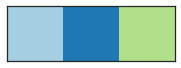

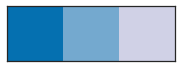

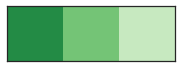

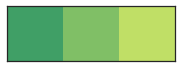

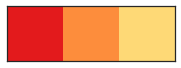

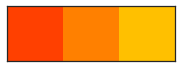

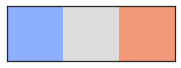

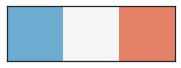

In [14]:

def plt_explained_variance(explained_var, gset_name, cmap):
    
    explained_var = np.asarray(explained_var) * 100
    explained_var_num = range(1,len(explained_var)+1)

    fig, ax = plt.subplots(1)
    fig.set_size_inches([8,10])

    sns.barplot(explained_var_num, explained_var, palette=cmap, alpha=0.8)
    #plt.plot(np.array(explained_var_num) - 1, explained_var, marker="o", markerfacecolor="k", c= 'r')
    #plt.scatter(np.array(explained_var_num) - 1, explained_var, s=100, facecolors='k', edgecolors='r')
    plt.yticks(fontsize=12, weight='bold')
    plt.xticks([0,1,2], [],fontsize=12, weight='bold')
    plt.ylim(0,30)
    plt.xlim(-0.75,2.75)
    plt.tick_params(axis='y', direction='in', labelsize=18)
    plt.tick_params(axis='x', direction='in', labelsize=18)
    sns.despine(left=False, bottom=False)

    plt.savefig(os.path.join(save_fig_dir, 'exp_var_%s.png'%gset_name), dppi  = 300, bbox_inches = 'tight')
    
P = sns.color_palette("Paired",3)
B = sns.color_palette("PuBu_r",3)
G = sns.color_palette("Greens_r",3)
R = sns.color_palette("YlOrRd_r",3)
S = sns.color_palette("summer",3)
A = sns.color_palette("autumn",3)
C = sns.color_palette("coolwarm",3)
D = sns.color_palette("RdBu_r",3)

sns.palplot(P)
sns.palplot(B)
sns.palplot(G)
sns.palplot(S)
sns.palplot(R)
sns.palplot(A)
sns.palplot(C)
sns.palplot(D)

In [18]:
from math import pi
import matplotlib.pyplot as plt

def plot_loadings(gset, C, sorter='PC1', save = 0, ticks = 0):
    # Set data
    if sorter != 'PC1':
        sorter = sorter
    loadings = pd.read_csv(os.path.join(ahba_dir,'loadings_%s.csv'%gset), 
                           index_col=0).sort_values(sorter, ascending=0)

    loading_index = [i for i in loadings.index]
    cat = loading_index
    values = list(loadings['PC1']) # [90, 60, 65, 70, 40]
    values2 = list(loadings['PC2']) # [90, 60, 65, 70, 40]
    values3 = list(loadings['PC3']) # [90, 60, 65, 70, 40]
    #values4 = list(loadings.PC4) # [90, 60, 65, 70, 40]

    N = len(cat)
    x_as = [n / float(N) * 2 * pi for n in range(N)]

    # Because our chart will be circular we need to append a copy of the first 
    # value of each list at the end of each list with data
    values.append(list(loadings['PC1'])[0])
    values = np.abs(np.array(values))

    values2.append(list(loadings['PC2'])[0])
    values2 = np.abs(np.array(values2))

    values3.append(list(loadings['PC3'])[0])
    values3 = np.abs(np.array(values3))


    x_as += x_as[:1]

    # Set color of axes
    plt.rc('axes', linewidth=0.5, edgecolor="#888888")

    # Create polar plot
    fig = plt.figure(figsize=(20,20))
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111, polar=True)

    # Set clockwise rotation. That is:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    #Set position of y-labels
    ax.set_rlabel_position(0)

    # Set color and linestyle of grid
    ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=1)
    ax.yaxis.grid(True, color="#888888", linestyle='dashed', linewidth=1)##888888

    # Set number of radial axes and remove labels
    myriad = {'fontname':'Myriad Pro'}
    print loading_index
    
    if ticks:
        plt.xticks(x_as[:-1], loading_index, size = 80, weight='bold')
    else:
        plt.xticks(x_as[:-1], [])

    # Set yticks
    #plt.yticks([20, 40, 60, 80, 100], ["20", "40", "60", "80", "100"])

    alpha =0.75
    ax.fill(x_as, values,  rgb2hex(C[0]), alpha=alpha)
    ax.fill(x_as, values2, rgb2hex(C[1]), alpha=alpha)
    ax.fill(x_as, values3, rgb2hex(C[2]), alpha=alpha)
    #ax.fill(x_as, values4, 'm', alpha=0.5)

    plt.tick_params(axis='y', direction='in', labelsize=15)
    plt.tick_params(axis='x', direction='in', labelsize=15)
    if save: 
        plt.savefig(os.path.join(save_fig_dir, 'loadings_%s.png'%gset), dpi = 300, bbox_inches='tight', transparent=1)


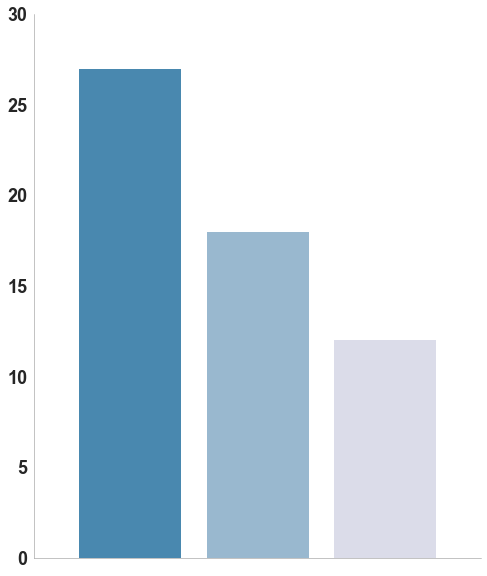

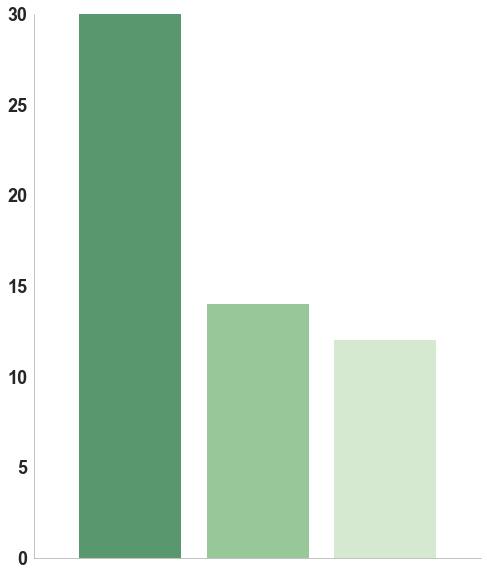

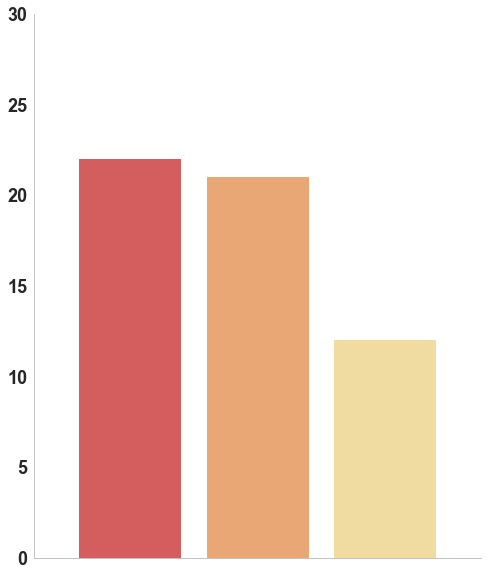

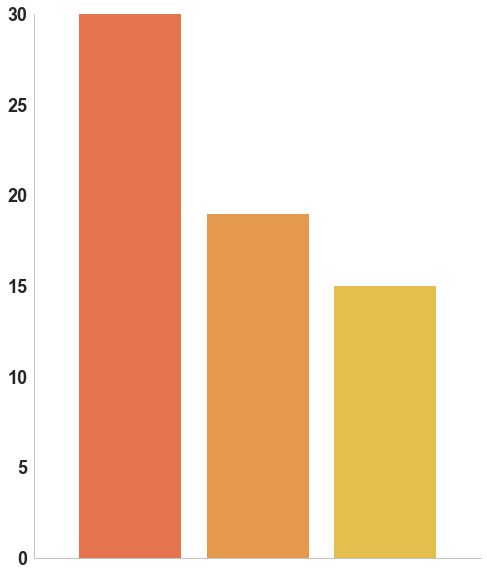

In [19]:
plt_explained_variance(IRON_H_ev, 'IRON_H', B)
plt_explained_variance(IRON_D_ev, 'IRON_D', G)
plt_explained_variance(IRON_T2_ev, 'IRON_T2',R)
plt_explained_variance(FERRITIN_ev, 'FERRITIN', A)

['FTH1', 'FTL', 'TF', 'IL6R', 'SLC40A1', 'IL6', 'IL1A', 'TNF', 'HFE', 'TFR2', 'HFE2', 'IREB2']
['MOG', 'TF', 'MOBP', 'MAL', 'KLK6', 'CRYAB', 'APOD', 'CA2', 'STMN4', 'CTSS', 'APOC1', 'DCK', 'LYZ', 'GSTM1', 'THRSP', 'HOMER1', 'RASGRP1']
['FTL', 'CYBRD1', 'HEPH', 'FTH1', 'HMOX1', 'ATP6V0E1', 'TF', 'ABCG2', 'SLC40A1', 'ATP6V0A4', 'TCIRG1', 'ATP6V1E2', 'HMOX2', 'SLC46A1', 'CP', 'ATP6V1D', 'ATP6V0B', 'ATP6V1E1', 'FLVCR1', 'ATP6V1G1', 'ATP6V0A2', 'ATP6V1C2', 'ATP6V1F', 'ATP6V1B2', 'ATP6V0D2', 'ATP6V1G3', 'TFRC', 'ATP6V1H', 'MCOLN1', 'ATP6V0C', 'ATP6V0D1', 'ATP6V1C1', 'STEAP3', 'ATP6V1A', 'ATP6V1B1', 'ATP6V1G2']
['FTH1', 'FTH1P20', 'FTL', 'FTHL17', 'FTH1P14', 'FTMT', 'FTLP17']


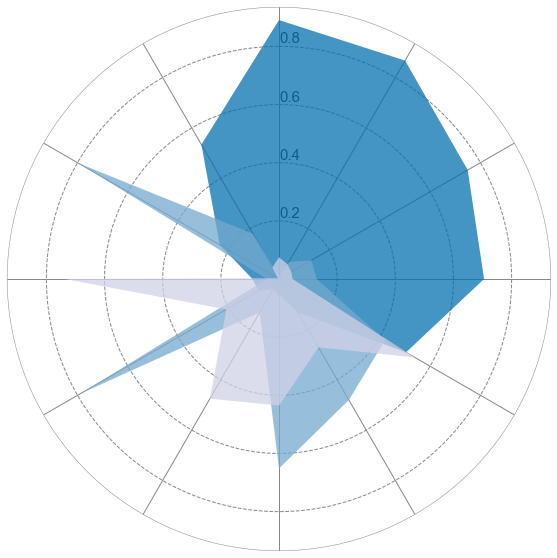

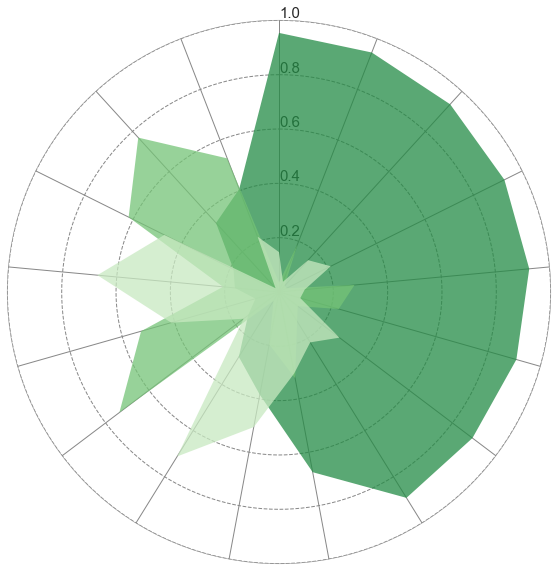

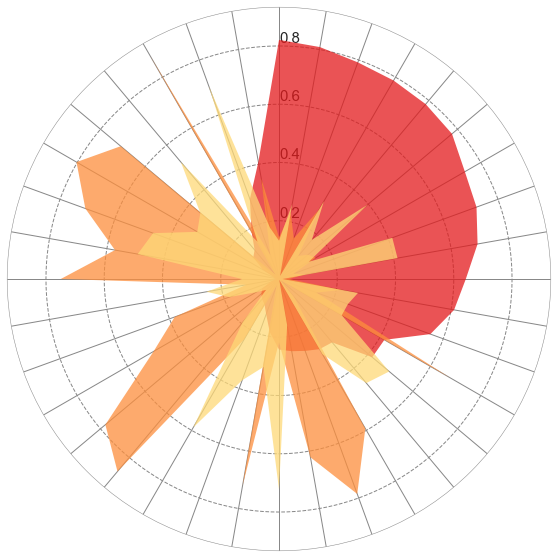

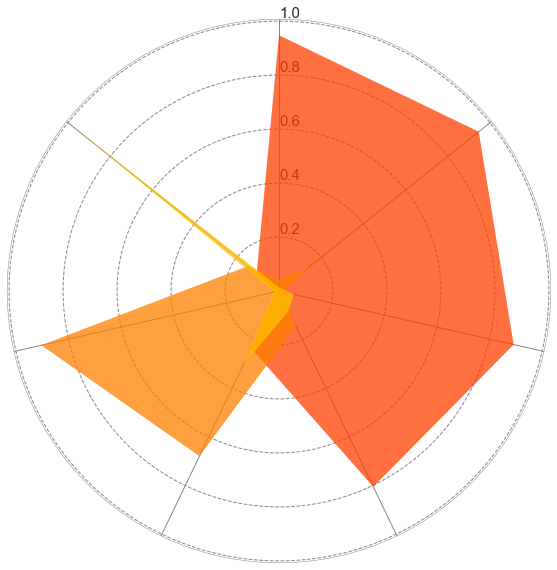

In [20]:
plot_loadings('IRON_HOMEOSTASIS', B, save=1)
plot_loadings('IRON_D', G, save=1)
plot_loadings('IRON_TRANSPORT2', R, save=1)
plot_loadings('FERRITIN', A, save=1)